In [29]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [30]:

data = pd.read_csv('spam.csv',encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [31]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['v1'])
data

# or using map()
#data['new_col']= data.v1.map({'ham':0,'spam':1})

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [36]:
import string
def stop_words(sen):
    word = stopwords.words('english')
    string.punctuation+='å'+'£'
    punct = [text for text in sen if text not in string.punctuation]
    se = "".join(punct)
    word_token = nltk.tokenize.word_tokenize(se)
    stopwor = [i for i in word_token if i.lower() not in word]
    string1 = " ".join(stopwor)
    return string1
# stop_words("Go until jurong point, crazy.. Available only")


In [37]:
data['new_sen'] = data.v2.apply(stop_words)
data

,v1,v2,label,new_sen
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah dont think goes usf lives around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u U 750 Pound prize 2...
5568,ham,Will Ì_ b going to esplanade fr home?,0,Ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,Pity mood Soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitching acted like id interested buying s...


In [38]:
# stemming

def stemming(sen):
    ts = nltk.stem.snowball.SnowballStemmer(language='english')
    word = nltk.tokenize.word_tokenize(sen)
    res =[]
    for i in word:
        
        res.append(ts.stem(i))
    stem_res = " ".join(res)
    return stem_res
# stemming("Go jurong point crazy Available bugis n great")

In [39]:
data['new_sen'] = data.new_sen.apply(stemming)
data

,v1,v2,label,new_sen
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,ham,Will Ì_ b going to esplanade fr home?,0,ì b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,piti mood soani suggest
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitch act like id interest buy someth els ...


In [40]:
x = data['new_sen']
y = data['label']

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)
len(xtrain),len(ytrain)

(3900, 3900)

In [42]:
len(xtest),len(ytest)

(1672, 1672)

In [43]:
xtest

3245    funni fact nobodi teach volcano 2 erupt tsunam...
944     sent score sopha secondari applic school think...
1044    know someon know fanci call 09058097218 find p...
2484     promis get soon youll text morn let know made ok
812     congratul ur award either 500 cd gift voucher ...
                              ...                        
2505                           congrat kanowhr treat maga
2525    say slowli godi love amp need youclean heart b...
4975                          gorgeous keep pix cum thank
650       that cool sometim slow gentl sonetim rough hard
4463             ranjith cal drpd deeraj deepak 5min hold
Name: new_sen, Length: 1672, dtype: object

In [44]:
# count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
xtrain = vec.fit_transform(xtrain)
xtest = vec.transform(xtest)
print(xtrain.shape)
#     vocabulary = vec.get_feature_names_out()
#     word_count = doc_term_matrix.toarray().sum(axis=0)
xtest

(3900, 6575)


<1672x6575 sparse matrix of type '<class 'numpy.int64'>'
	with 12617 stored elements in Compressed Sparse Row format>

In [45]:
# TF-IDF for checking the importance of words

from sklearn.feature_extraction.text import TfidfTransformer
tfid =  TfidfTransformer()
xtrain = tfid.fit_transform(xtrain)

In [46]:
#  model building and model evaluation

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
model = MultinomialNB()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred
acc_score = accuracy_score(ytest,pred)*100
print("Accuracy:",acc_score)
cm = confusion_matrix(ytest,pred)
print('confussion metrics is :',cm)

Accuracy: 97.66746411483254
confussion metrics is : [[1452    1]
 [  38  181]]


<AxesSubplot:>

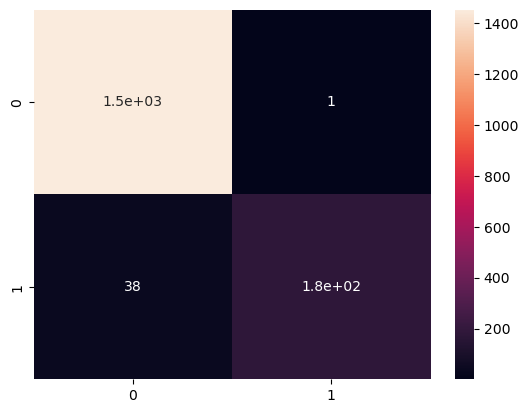

In [47]:
import seaborn as sns
sns.heatmap(cm,annot=True)

# logistic regression model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)
pred_lr = model_lr.predict(xtest)
acc_score_lr = accuracy_score(ytest,pred_lr)*100
print("Accuracy:",acc_score_lr)
cm_lr = confusion_matrix(ytest,pred_lr)
print('confussion metrics is :',cm_lr)

Accuracy: 96.35167464114832
confussion metrics is : [[1407   46]
 [  15  204]]


<AxesSubplot:>

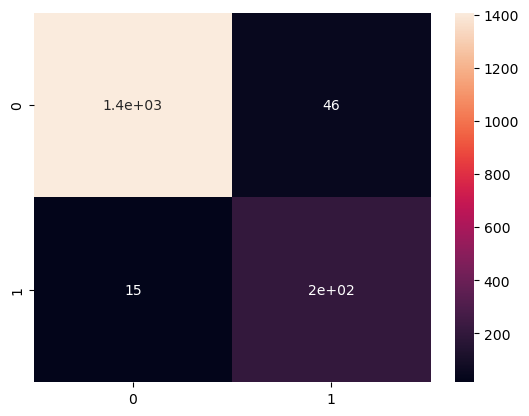

In [49]:
sns.heatmap(cm_lr,annot=True)

In [50]:
# pipeline 

# from sklearn.pipeline import Pipeline
# pipe = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('mnb',MultinomialNB())])
# pipe.fit(xtrain,ytrain)
# pipe_pred = pipe.predict(xtest)

In [51]:
# acc_score = accuracy_score(ytest,pipe_pred)*100
# print("Accuracy:",acc_score)
# cm = confusion_matrix(ytest,pipe_pred)
# print('confussion metrics is :',cm)

In [52]:
# sns.heatmap(cm,annot=True)

In [53]:
#model prediction
pre_sen = "Dont worry. I guess he's busy."
pre_sen = stop_words(pre_sen)
pre_sen = stemming(pre_sen)
pre_sen

'dont worri guess hes busi'

In [54]:
pre_sen = vec.transform([pre_sen])


In [55]:
predict = model.predict(pre_sen) 
predict

array([0])